In [38]:
#importing Libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


import matplotlib.pyplot as plt

In [15]:

print(keras.__version__)

2.4.3


In [16]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#importing Datasets

train_path='/content/drive/MyDrive/Dataset/Cotton/train'
val_path='/content/drive/MyDrive/Dataset/Cotton/val'

In [36]:
#Creating Function to see the images.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [40]:
#Data augmentation
training_datagen=ImageDataGenerator(rescale=1.0/255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [19]:
training_data=training_datagen.flow_from_directory(train_path,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1951 images belonging to 4 classes.


In [20]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [21]:
valid_datagen= ImageDataGenerator(rescale=1.0/255)

valid_data=valid_datagen.flow_from_directory(val_path, 
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary'
                                             )

Found 324 images belonging to 4 classes.


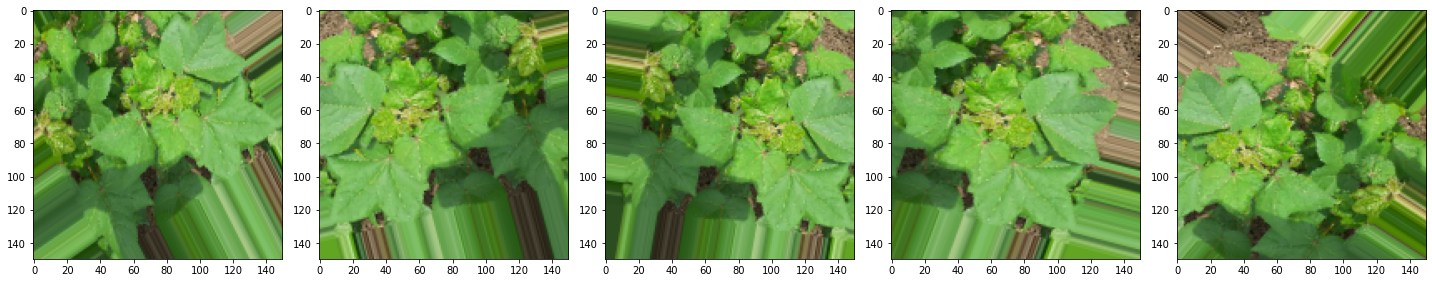

In [37]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [22]:
model_path='/content/drive/MyDrive/Dataset/Cotton'
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy', verbose=1,save_best_only=True,mode='max')
callback_list=[checkpoint]

Creating CNN Model





In [23]:
cnn_model=keras.models.Sequential([
                                  keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                  keras.layers.Conv2D(filters=64,kernel_size=3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=128,kernel_size=3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=256,kernel_size=3),
                                  keras.layers.MaxPooling2D(pool_size=(2,2)),


                                 keras.layers.Dropout(0.5),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128,activation='relu'),
                                  keras.layers.Dropout(0.1),
                                  keras.layers.Dense(units=256,activation='relu'),
                                  keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=4,activation='softmax')
                                  ])

In [24]:
cnn_model.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [26]:
history=cnn_model.fit(training_data,
                      epochs=100,
                      verbose=1,
                      validation_data=valid_data,
                      callbacks=callback_list
                      )

Epoch 1/100
61/61 [==============================] - 25s 396ms/step - loss: 1.3048 - accuracy: 0.4116 - val_loss: 1.0583 - val_accuracy: 0.5309

Epoch 00001: val_accuracy improved from -inf to 0.53086, saving model to /content/drive/MyDrive/Dataset/Cotton
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/Cotton/assets
Epoch 2/100
61/61 [==============================] - 24s 392ms/step - loss: 1.0691 - accuracy: 0.5334 - val_loss: 1.1704 - val_accuracy: 0.4012

Epoch 00002: val_accuracy did not improve from 0.53086
Epoch 3/100
61/61 [==============================] - 24s 390ms/step - loss: 0.9514 - accuracy: 0.6012 - val_loss: 0.8554 - val_accuracy: 0.6358

Epoch 00003: val_accuracy improved from 0.53086 to 0.63580, saving model to /content/drive/MyDrive/Dataset/Cotton
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/Cotton/assets
Epoch 4/100
61/61 [==============================] - 24s 398ms/step - loss: 0.8727 - accuracy: 0.6454 - val_loss: 1.0006 - va

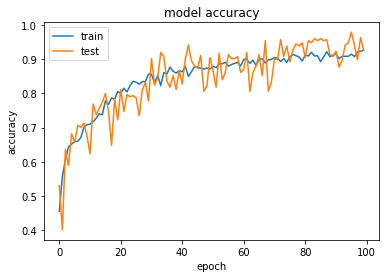

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

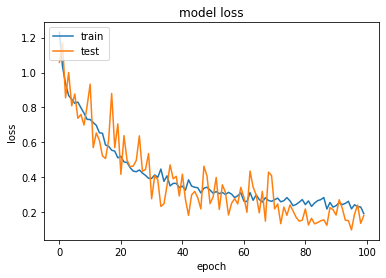

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
history.history

{'accuracy': [0.4556637704372406,
  0.5571501851081848,
  0.6073808073997498,
  0.6437724232673645,
  0.6519733667373657,
  0.6586365699768066,
  0.6601742506027222,
  0.6704254150390625,
  0.7011789083480835,
  0.7083547115325928,
  0.7098923921585083,
  0.7170681953430176,
  0.7273193001747131,
  0.7406458258628845,
  0.7375704646110535,
  0.7780625224113464,
  0.7678113579750061,
  0.7867760062217712,
  0.782675564289093,
  0.8052281141281128,
  0.8001025319099426,
  0.8149666786193848,
  0.8042029738426208,
  0.822142481803894,
  0.8349564075469971,
  0.8323936462402344,
  0.8267555236816406,
  0.8344438672065735,
  0.8344438672065735,
  0.8559712767601013,
  0.8549461960792542,
  0.8303434252738953,
  0.852895975112915,
  0.8226550221443176,
  0.8605843186378479,
  0.8564838767051697,
  0.876473605632782,
  0.8646847605705261,
  0.8590466380119324,
  0.8662224411964417,
  0.8631470799446106,
  0.8785238265991211,
  0.8493080735206604,
  0.863659679889679,
  0.8774987459182739,
  0

In [29]:
test_path='/content/drive/MyDrive/Dataset/Cotton/test'

In [30]:
test_datagen= ImageDataGenerator(rescale=1.0/255)

test_data=valid_datagen.flow_from_directory(test_path, 
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary'
                                             )

Found 36 images belonging to 5 classes.


In [31]:
y_pred=cnn_model.predict(test_data)

In [32]:
y_pred

array([[6.17824162e-06, 2.31948681e-02, 2.03556083e-05, 9.76778626e-01],
       [5.28204255e-03, 1.04143622e-03, 9.90719795e-01, 2.95671611e-03],
       [9.99739349e-01, 3.47474997e-05, 2.22273840e-04, 3.60724766e-06],
       [3.12312727e-06, 9.99673963e-01, 4.25878125e-06, 3.18698585e-04],
       [1.93046164e-02, 7.58135691e-02, 8.93954396e-01, 1.09274276e-02],
       [4.20456587e-07, 9.99833345e-01, 2.39489708e-07, 1.65896708e-04],
       [8.88946743e-05, 1.09735213e-01, 2.21355283e-03, 8.87962282e-01],
       [1.54994796e-05, 7.93004155e-01, 1.17141406e-06, 2.06979185e-01],
       [8.64074354e-06, 1.05684765e-01, 1.54949259e-04, 8.94151628e-01],
       [3.00019529e-08, 9.99707162e-01, 3.35553771e-08, 2.92788551e-04],
       [9.92538757e-04, 3.19347532e-06, 9.98993456e-01, 1.08512995e-05],
       [6.18010308e-05, 2.20103800e-01, 2.27837311e-03, 7.77556002e-01],
       [6.57013006e-05, 5.78751862e-01, 1.51537498e-03, 4.19667095e-01],
       [6.52409904e-09, 9.99971509e-01, 4.67774219e

In [33]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([3, 2, 0, 1, 2, 1, 3, 1, 3, 1, 2, 3, 1, 1, 0, 2, 2, 0, 1, 1, 3, 1,
       3, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 3])